In [19]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt 
%matplotlib inline 
import sys 
sys.path.append('/home/ak/Documents/Research/QFPaper/Code/') 

from hmm import hmm_calibration
from observation_models import Gaussian
from sklearn.datasets.samples_generator import make_spd_matrix
from hmm_utils import normalize

prng = np.random.RandomState(10)
n_hidden_states = 3
n_features = 2
###This is like the set up func Unit test of hmmlearn ############
startprob = prng.rand(n_hidden_states)
startprob = startprob / startprob.sum()
transmat = prng.rand(n_hidden_states, n_hidden_states)
transmat /= np.tile(transmat.sum(axis=1)[:, np.newaxis],
                                 (1, n_hidden_states))

means = prng.randint(-20, 20, (n_hidden_states, n_features))
covars = (1.0 + 2 * prng.rand(n_hidden_states, n_features)) ** 2
            
transmat = normalize(transmat + np.diag(prng.rand(n_hidden_states)), 1)
diag_sigmas = covars

sample_size = 100

update_tag = 'tpsm'

states = hmm_calibration.sample_states(startprob, transmat, prng, sample_size=sample_size)
obs = Gaussian.sample_data(states, 20*means, diag_sigmas, rng=prng)
obs_model = Gaussian(n_hidden_states, n_features)
the_hmm = hmm_calibration(obs_model, n_hidden_states, max_iter=10)
res = the_hmm.run_hmm(obs, update_tag=update_tag, initialise_method_tag='uniform', rng=prng)



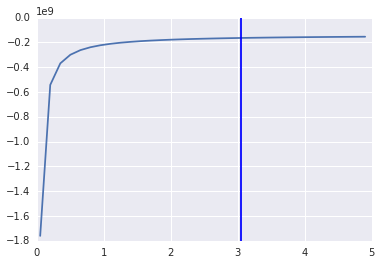

In [25]:
changing_params_name = 'sigmas_'
no_state = 0
sigma_entry = 1
step_object =res['step_calibrations'][2]

#this is the variable that the M-step calculated at the step-th step 

changing_params = getattr(step_object.obs_model_, changing_params_name)
theoretical_solution = changing_params[no_state][sigma_entry]
#and these should be the optimal observation likelihood and complete data likelihood
optimal_obs_ll = step_object.obs_model_.score(obs)
complete_data_ll_optimal = step_object.complete_data_log_likelihood(optimal_obs_ll)

# now lets vary the "var_to_plot[no_state]" and make sure we indeed hit a maxima
range1 = np.arange(0.05, theoretical_solution, (theoretical_solution-0.05)/20.)
range2 = np.arange(theoretical_solution, 5., (5. - theoretical_solution)/20.)
variable_range = np.concatenate((range1, range2))
values_range = []
for var in variable_range:
    changing_params[no_state][sigma_entry] = var
    #setattr(step_object.obs_model_, changing_params_name, changing_params) 
    #print getattr(step_object.obs_model_, changing_params_name)
    obs_ll = step_object.obs_model_.score(obs)
    values_range.append(step_object.complete_data_log_likelihood(obs_ll))

plt.plot(variable_range, values_range)
plt.axvline(x=theoretical_solution) 
plt.show()

In [ ]:
values_range

##Below: Increased the size of the observation data, in model fitting##

In [29]:
#defining new sample set of observation data
sample_size =1000
states = hmm_calibration.sample_states(startprob, transmat, prng, sample_size=sample_size)
obs = Gaussian.sample_data(states, 20*means, diag_sigmas, rng=prng)
obs_model = Gaussian(n_hidden_states, n_features)
the_hmm = hmm_calibration(obs_model, n_hidden_states, max_iter=10)


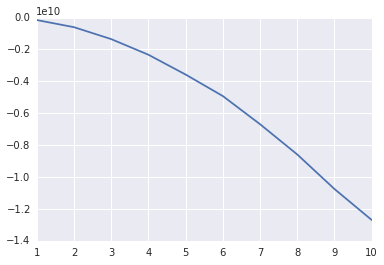

In [31]:
complete_log_likelihoods =[]

for i in range(1,11): 
    df = obs[0:i*100]
    result = the_hmm.run_hmm(df, update_tag=update_tag, initialise_method_tag='uniform', rng=prng)
    last_calibration = result['step_calibrations'][-1]
    optimal_obs_ll = last_calibration.obs_model_.score(df)
    complete_log_likelihoods.append(last_calibration.complete_data_log_likelihood(optimal_obs_ll)) 

plt.plot(range(1,11), complete_log_likelihoods)          